# Basic Machine Learning Models: Linear Regression

This notebook will feature information related to linear regression and its common variants. We'll be showing how to use them in python, examine their output and evaluate the performance of the model as well. This notebook is intended as a simple introduction into the material though does assume a basic understanding of programming in Python. This is not intended as an in depth evaluation, more as a quick reference and primer.

Models shown in this notebook:
| Model | Description |
|---|---|
| Linear Regression | Fitting a line to data. Simple, prone to overfitting. |
| Ridge Regression | Linear regression but penalizes large coefficients to combat overfitting. |
| Lasso Regression | Similar to ridge but uses a different "shrinkage penalty" |

Before we start, I need to load in some libraries that I'll be using for demonstration. 

In [1]:
import sklearn
import pandas as pd
import numpy as np
import plotly.express as px

# The Data

We'll be using the classic **Iris** dataset for this demo. This dataset is like the gold standard for learning the basics, it is a fantastic toy example to work with. For the sake of this demo I want a dataset that'll make everything as easy as possible for me so we can focus on what matters. 

The data itself contains some measurements from different species of Iris flowers. Specifically measurements of the sepal and the petals. Below is a diagram showing the basic structure of a flower, created by Judy Mason and found [here](https://plantid.net/Classic/Glossary/Sepal.htm?AspxAutoDetectCookieSupport=1).

![](../images/flower_diagram_judy_mason.jpg)

Any other information I'd provide here would be redundant when the [docs](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset) cover everything super critical.

In [11]:
df = px.data.iris()
display(df.head())
print(f"Rows in Iris: {df.shape[0]}")

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


Rows: 150


In [3]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# Linear Regression

Linear regression, without going into too much detail, involves fitting a line to data. For simple linear regression involving 2 variables, it is a model that tries to predict the value of y when given a certain value of x. We get there by "fitting" a line to training data. 

For linear regression to be appropriate, we first need to gauge if there appears to be a linear relationship between the variables we're working with. Linear regression completely falls apart if we're working with a non-linear relationship.

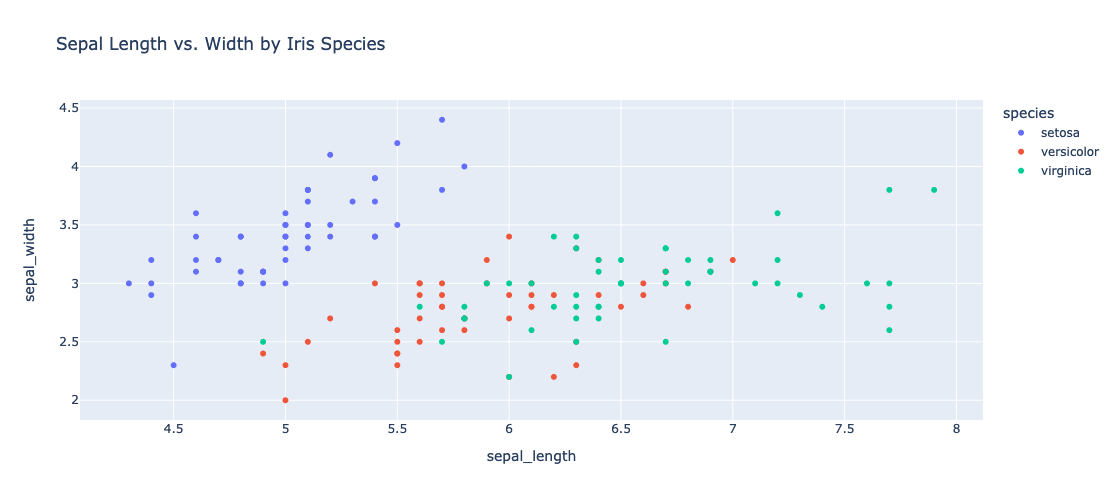

In [22]:
px.scatter(df , x="sepal_length", y='sepal_width', color="species", title="Sepal Length vs. Width by Iris Species", height=500)

At first glance there doesn't appear to be a linear relationship here, however if we look at the "setosa" species we may actually have what we're working for. We can focus our energy only on that subset of the data for our demonstration. 

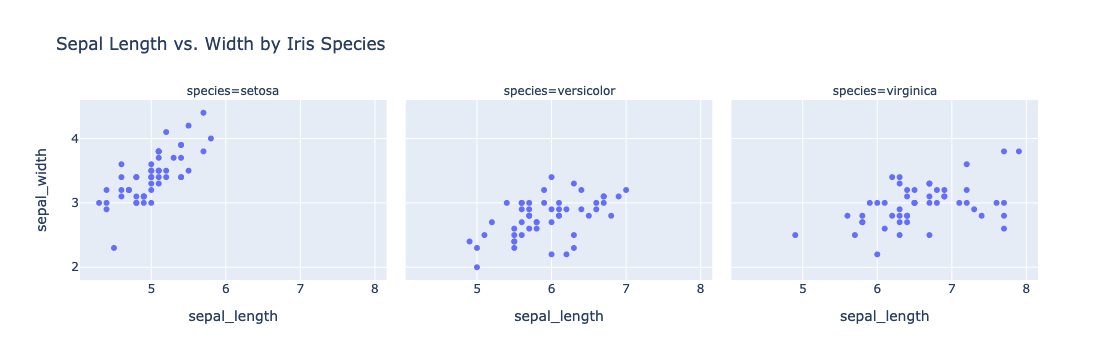

In [27]:
px.scatter(df , x="sepal_length", y='sepal_width', facet_col="species", title="Sepal Length vs. Width by Iris Species")

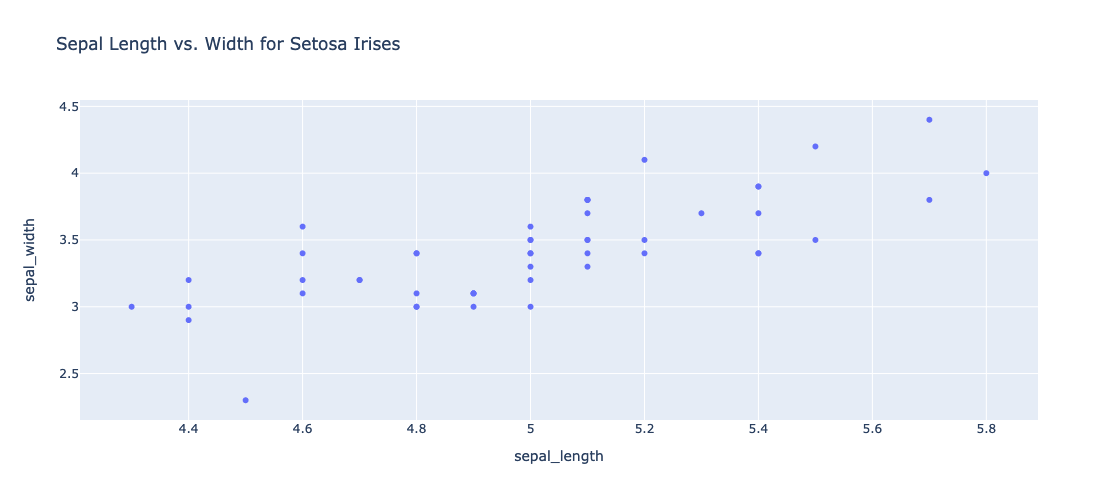

In [20]:
setosa = df.loc[df["species"] == "setosa"]
px.scatter(setosa , x="sepal_length", y='sepal_width', title="Sepal Length vs. Width for Setosa Irises", height=500)

In [24]:
print(f"Setosa Rows: {setosa.shape[0]}")

Setosa Rows: 50
